# ML courses 5 & 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [33]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [34]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [35]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [36]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [38]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.head(5)
#0 means malignant tumor, 1 mean benign tumor

,tumor type
0,0
1,0
2,0
3,0
4,0


In [39]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [40]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission

We have here a large data set that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

* We check at first if the tumor radius is a good predictor for breast cancer.
  1. Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?
  2. Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.
  3. Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?    
  4. Train a logistic regression model.
  5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model.  
  More formally: $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._
  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition.
  7. <font color=red>Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well.  
Comment your results. What can you say about your model's performance?</font> 
  8. <font color=red>Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why?  
    How can we adapt the output of the model to modify the precision/recall of the prediction in this regard?</font>  
  9. <font color=red>BONUS: Tweak your model's prediction the way you proposed in your answer of question 8. Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. Comment your results.</font>
* We decide to add an extra predictor to our model.
  10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  11. Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  12. <font color=red>How has the classification performance increased?</font>
* Comparison of the two models: 
  13. <font color=red>Plot the ROC curves of the two previous models and make the comparison.</font> 
  14. <font color=red>Compute the LogLoss values of the two previous models and make the comparison.</font> 

# 1 Perform data exploration on mean radius, taking into account the target class attributions. Do you think mean radius can make an good predictor of tumor type?

In [41]:
#First Step Let's merge subdata into one data
cancer_data = pd.merge(features,target,left_index=True,right_index=True)
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Text(0.5, 0, 'Mean Radius')

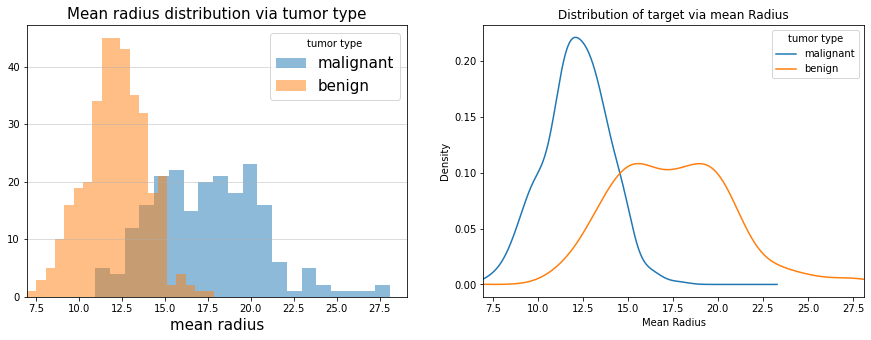

In [42]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
target=cancer_data['tumor type'].unique()
for variety in target:
    subset=cancer_data[cancer_data['tumor type']==variety]
    plt.hist(subset['mean radius'], alpha=0.5, label="Survived", bins=20)
# split into small set data (variety)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('mean radius',fontsize = 15)
plt.legend(['malignant','benign'], title='tumor type',fontsize = 15)
plt.title('Mean radius distribution via tumor type',fontsize = 15)
plt.xlim(cancer_data['mean radius'].min(),cancer_data['mean radius'].max()+1)

plt.subplot(1, 2, 2)
cancer_data.groupby('tumor type')['mean radius'].plot(kind='density')
plt.xlim(cancer_data['mean radius'].min(),cancer_data['mean radius'].max())
plt.title("Distribution of target via mean Radius")
plt.legend(title = 'tumor type', labels =['malignant','benign']) # add label names
plt.xlabel('Mean Radius')

Based on the figures above, a malignant tumor will likely have a larger mean radius than a benign tumor. So the mean radius can make an good predictor of tumor type.

# 2 Encode the target variable ("tumor type") and make sure you code 0 as 'benign' and 1 as 'malignant'.¶

In [43]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cancer_data['tumor type']= label_encoder.fit_transform(cancer_data['tumor type'])


In [44]:
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# 3 Plot the target variable with respect to mean radius (scatter plot). Do you think a logistic regression model can model the relationship between the two variables reasonably well? Why or why not?

[Text(0.5, 1.0, 'tumor type class attributions with mean radius')]

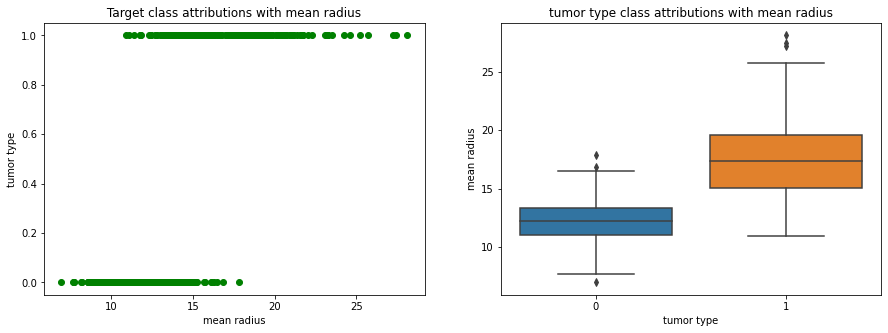

In [45]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
plt.scatter(cancer_data['mean radius'],cancer_data['tumor type'], c='green')
plt.ylabel("tumor type")
plt.xlabel("mean radius")
plt.title(" Target class attributions with mean radius ")
plt.subplot(1, 2, 2)
sns.boxplot(x = 'tumor type',y='mean radius', data = cancer_data).set(title='tumor type class attributions with mean radius')


Based on the plot. A logistic regression model can model the relationship between the two variables reasonably well because the target (tumor type) depends on the mean radius.

Train a logistic regression model.

In [46]:
X =cancer_data[['mean radius']].values
#X = np.array(X, dtype=float)
y=cancer_data['tumor type']
print(X[:10])

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]


Train-test split:

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


Feature scaling:

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the logistic regression model

In [49]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# 5 Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of mean radius, according to your logistic regression model.

Text(0.5, 1.0, 'Probability of having a malignant tumor')

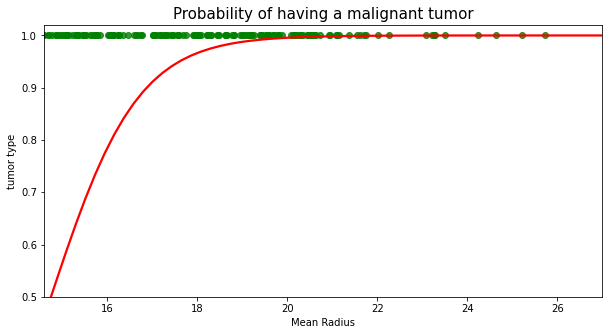

In [50]:
plt.figure(figsize = [10, 5])
sns.regplot(x=X, y=y, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.ylim(0.5,1.02)
plt.xlim(14.6,27)
plt.xlabel('Mean Radius')
plt.title("Probability of having a malignant tumor", size=15)

# 6 According to your model, what is the minimum mean radius value for considering that the tumor is malignant? Make a few predictions with your model with different values of mean radius to check your intuition.

In [51]:
mean_radius=14.83
print(classifier.predict(sc.transform([[mean_radius]])))

[1]


So,the minimum mean radius value for considering that the tumor is malignant is 14.83

In [52]:
mean_radius=17
print(classifier.predict(sc.transform([[mean_radius]])))

[1]


In [53]:
mean_radius=10
print(classifier.predict(sc.transform([[mean_radius]])))

[0]


# 7 Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix. Compute the f1-score as well. Comment your results. What can you say about your model's performance?

Making predictions

In [54]:
y_proba = classifier.predict_proba(X_test)
y_proba[:10]


array([[0.77864652, 0.22135348],
       [0.80627905, 0.19372095],
       [0.67015463, 0.32984537],
       [0.62161353, 0.37838647],
       [0.82996408, 0.17003592],
       [0.95612735, 0.04387265],
       [0.9207811 , 0.0792189 ],
       [0.94063649, 0.05936351],
       [0.99812743, 0.00187257],
       [0.98266889, 0.01733111]])

In [55]:
#Prediction of the class and comparison with the true one:

y_pred = classifier.predict(X_test)
#y_pred dc auyet dinh boi y_proba ()


Performance assessment

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


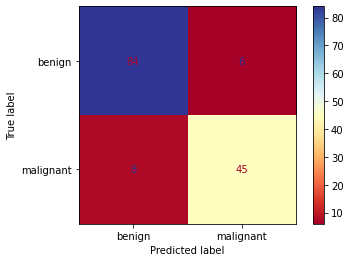

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay(cm, display_labels=["benign","malignant"]).plot(cmap='RdYlBu')

Accuracy, precision, recall:

In [58]:
# Accuracy, precision, recall by hand
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

Accuracy=((TP+TN)/(TP + TN + FP + FN))
Precision=(TP/(TP + FP))
Recall=(TP/(TP + FN))
F1_score=(2/((1/Recall)+(1/Precision)))
print('Accuracy is ', round(Accuracy,2))
print('Precision is ', round(Precision,2))
print('Recall is ', round(Recall,2))
print('F1_score is ', round(F1_score,2))


Accuracy is  0.9
Precision is  0.88
Recall is  0.85
F1_score is  0.87


In [59]:
# to make sure the result, let call function to calculate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def Performance_model(y_test,y_pred):
    print('Accuracy is ' + str(round(accuracy_score(y_test, y_pred),2)))
    print('Precision is ' + str(round(precision_score(y_test, y_pred),2)))
    print('Recall is ' + str(round(recall_score(y_test, y_pred),2)))
    print('F1 score is ' + str(round(f1_score(y_test, y_pred), 2)))

In [60]:
Performance_model(y_test,y_pred)

Accuracy is 0.9
Precision is 0.88
Recall is 0.85
F1 score is 0.87


Accuracy metric is 0.9. It means that the proportion of correct predictions is 90%
Precision metric is 0.88. It means that the proportion of true malignant among malignant predictions is 88% . Less false malignant.
Recall is 0.85. It means that the proportion of true malignant that are correctly predicted is 85%. Less false benign . 
So we have low false malignant and low false benign. Therefore, we can conclude that oOur model predicts with high accuracy.

# 8 Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why?How can we adapt the output of the model to modify the precision/recall of the prediction in this regard?

Answer: Our main purpose is to diagnose breast cancer earlier so that it can be treated in time. Recall= TP/(TP+FN) Precision= TP/(TP+FP) Based on the formula of Recall and precision, We must focus on increasing recall. When Recall is increased, of course we have a small FN. In our case, it means that patients with malignant tumors but diagnosed as benign tumors will reduce. So, Patients with early detection and timely treatment. This is more important than Inceasing Precision to reduce the patient with benign tumors but they are diagnosed as malignant(FP actual they have a good health).

To adapting the output of the model to modify the precision/recall of the prediction in this regard. We can adjust/set a new the threshold of the model

# 9 BONUS: Tweak your model's prediction the way you proposed in your answer of question 8. Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. Comment your results.

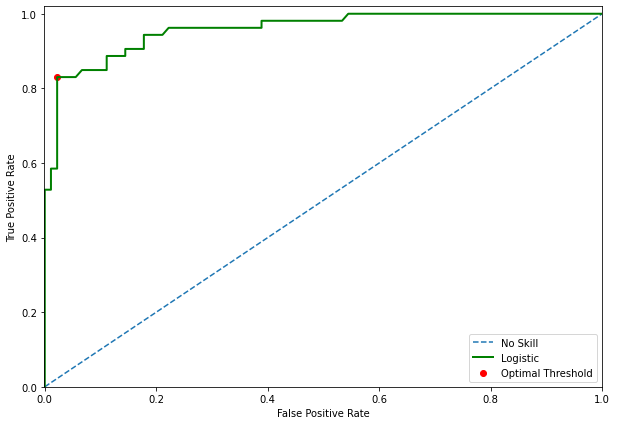

Best Threshold =0.550581


In [64]:
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve, roc_auc_score


# calculate roc curves
y_score_ = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_)

# position has optimal threshold
position = np.argmax(true_positive_rate-false_positive_rate)

# plot the roc curve for the model
plt.subplots(figsize=(10,7));
plt.plot([0,1], linestyle='--', label='No Skill')
plt.plot(false_positive_rate, true_positive_rate,  c='green', linewidth=2, label='Logistic')
plt.scatter(false_positive_rate[position], true_positive_rate[position], marker='o', color='red', alpha=1, label='Optimal Threshold')

# axis labels
plt.xlim([-0.001, 1])
plt.ylim([0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

print('Best Threshold =%f' % (threshold[position]))

So Our best threshold is 0.550581

In [66]:
Opimal_threshold=threshold[position]

y_pred_ = np.where(classifier.predict_proba(X_test)[:,1] > Opimal_threshold, 1, 0)

In [67]:
Performance_model(y_test,y_pred_)

Accuracy is 0.92
Precision is 0.96
Recall is 0.81
F1 score is 0.88


Conclusion:
    
Most stats are increased like Accuracy,Precision,F1 score But recall is reduced a bit.
It looks good but it doesn't suit our aim of increasing recall (reducing false negatives) for early diagnosis of breast cancer so that it can be treated if necessary.

# 10 Inspect the data in order to tell — between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).

In [68]:
sub_data=cancer_data[['mean radius','mean texture','mean perimeter','mean area','tumor type']]
#y_=cancer_data['target']
sub_data


,mean radius,mean texture,mean perimeter,mean area,tumor type
0,17.99,10.38,122.80,1001.0,1
1,20.57,17.77,132.90,1326.0,1
2,19.69,21.25,130.00,1203.0,1
3,11.42,20.38,77.58,386.1,1
4,20.29,14.34,135.10,1297.0,1
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1
565,20.13,28.25,131.20,1261.0,1
566,16.60,28.08,108.30,858.1,1
567,20.60,29.33,140.10,1265.0,1


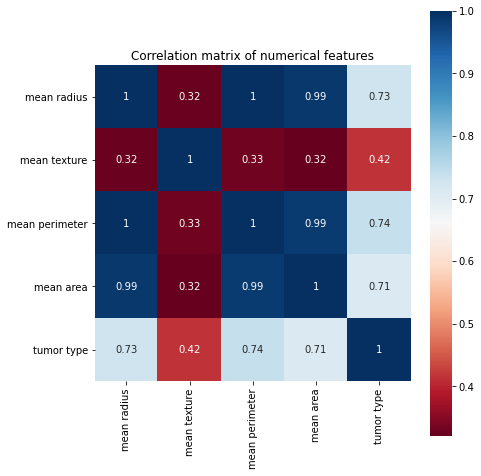

In [226]:
# Check Correlation matrix of numerical features
corr=sub_data.corr()
plt.subplots(figsize=(7,7));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

Based on correlation matrix. We can see that in addition to the mean radius highly correlated with the target, we also have the mean perimeter highly correlated with the target (0.74). Let pick this predictor.

Re-train your logistic regression with your two predictors (mean radius and the one you have picked).

Train-test split:

# 11 Re-train your logistic regression with your two predictors (mean radius and the one you have picked

In [69]:
X1=cancer_data[['mean radius','mean texture']]

y1= cancer_data['tumor type']

In [70]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


Feature scaling:

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

Training the logistic regression model

In [72]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X1_train, y1_train)

LogisticRegression()

# 12 How has the classification performance increased?

In [73]:
y1_proba = classifier1.predict_proba(X1_test)
y1_proba[:10]

array([[0.73772676, 0.26227324],
       [0.55593482, 0.44406518],
       [0.81493988, 0.18506012],
       [0.67812157, 0.32187843],
       [0.85861081, 0.14138919],
       [0.96409106, 0.03590894],
       [0.85774994, 0.14225006],
       [0.94590859, 0.05409141],
       [0.99407949, 0.00592051],
       [0.99378262, 0.00621738]])

In [74]:
from sklearn.metrics import confusion_matrix
y1_pred=classifier1.predict(X1_test)
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)

[[83  7]
 [ 7 46]]


In [75]:
Performance_model(y1_test,y1_pred)

Accuracy is 0.9
Precision is 0.87
Recall is 0.87
F1 score is 0.87


In [76]:
# one predictor
print(cm)

[[84  6]
 [ 8 45]]


All metrics are slightly increased.
With the mean radius as unique predictor that have one more false negative and one more false positive than two predictors
Therefore, the model with two predictions will be more accurate than the single predictor model.



# 13 Comparison of the two models:
13 Plot the ROC curves of the two previous models and make the comparison.

ROC for model 1

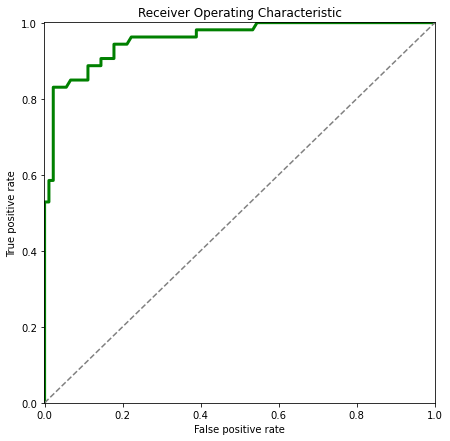

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

In [236]:
print('AUC: ', roc_auc_score(y_test, y_score))

AUC:  0.9575471698113208


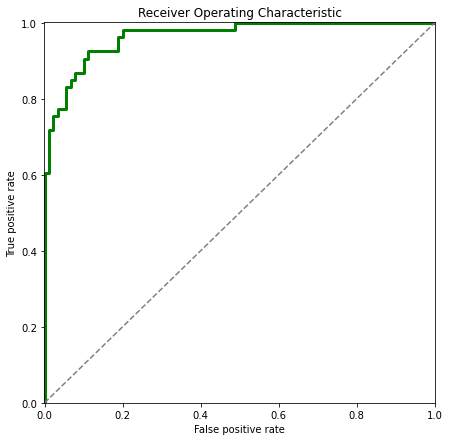

In [78]:

y1_score = y1_proba[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y1_test, y1_score)

plt.subplots(1, figsize=(7,7))
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=3)

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--", c='grey')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

plt.show()

ROC for model 2

In [79]:
print('AUC: ', roc_auc_score(y1_test, y1_score))

AUC:  0.9654088050314464


Based on two plot and score above. We can see that the model with two predictions have more true positive rate than the model with one predictor and less than false positive rate than one predictor as well.

# 14 Compute the LogLoss values of the two previous models and make the comparison.

In [82]:
#for model 1 one predictor
from sklearn.metrics import log_loss
log=log_loss(y_test,y_score)
log

0.26157558705399137

for the model with two predictor

In [83]:
log1=log_loss(y1_test,y1_score)
log1

0.23166475396532962

For any given problem, a lower log loss value means better predictions.
The model with two predictor has Logloss value (2.89) less than the unique predictor model (3.38). It shows that The model with two predictor is better prediction than the unique predictor model 